In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joelleng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joelleng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/joelleng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joelleng/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
df = pd.read_csv('trip_advisor.csv')

ta_df = df.copy()

# DATA CLEANING

In [8]:
ta_df.isnull().sum()

Review Title           0
Review Text            0
Date of Stay           0
Author Contribution    0
Rating                 0
dtype: int64

In [9]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Review Title         11232 non-null  object 
 1   Review Text          11232 non-null  object 
 2   Date of Stay         11232 non-null  object 
 3   Author Contribution  11232 non-null  object 
 4   Rating               11232 non-null  float64
dtypes: float64(1), object(4)
memory usage: 438.9+ KB


In [10]:
ta_df['Rating'] = ta_df['Rating'].astype(int)
ta_df['Date of Stay'] = pd.to_datetime(ta_df['Date of Stay'], format='%Y-%m-%d')

ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Review Title         11232 non-null  object        
 1   Review Text          11232 non-null  object        
 2   Date of Stay         11232 non-null  datetime64[ns]
 3   Author Contribution  11232 non-null  object        
 4   Rating               11232 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 438.9+ KB


In [11]:
ta_df.head()

,Review Title,Review Text,Date of Stay,Author Contribution,Rating
0,Must see in Singapore,A must not miss place for tourists to visit wh...,2024-03-01,73,5
1,Marina Bay world class,Amazing hotel and loved the facilities. Being ...,2024-03-01,1,5
2,Nice touch.,While the initial check in experience was not ...,2024-03-01,2,5
3,Amazing experience at MBS with superb hospital...,I booked the Sands Premiere Suite to celebrate...,2024-03-01,1,5
4,Incredibile,"Nina is amazing as all the team, I loved her h...",2024-03-01,2,5


In [12]:
def clean_text(text):
    cleaned_text = ''.join([char.lower() for char in text if char.isalpha() or char.isspace()])
    return cleaned_text

In [13]:
def process_text(text):
    
    # Initialise
    lemmatizer = WordNetLemmatizer()
    processed_text = " "
    
    # Process input
    text_lower = text.lower()
    word = word_tokenize(text_lower)
    
    # Alphabetical Tokens
    alphabetic_tokens = [word for word in word if re.match('^[a-zA-Z]+$', word)]
    
    # Remove stopwords from text and lemmatize
    stop_words = set(stopwords.words('english'))

    
    
    lem_words = []
    for word in alphabetic_tokens:
        if word not in stop_words:
            lem_words.append(lemmatizer.lemmatize(word))
    
    # Join the list of words
    processed_text = processed_text.join(lem_words)     #print(edited_stop_words)

    return processed_text

In [14]:
# ta_df['review_clean'] = ta_df['Review Text'].apply(clean_text)
# ta_df['title_clean'] = ta_df['Review Title'].apply(clean_text)

# review_string = ' '.join(list(ta_df.review_clean.values))
# title_string =  ' '.join(list(ta_df.title_clean.values))

ta_df['review_clean'] = ta_df['Review Text'].apply(process_text)
ta_df['title_clean'] = ta_df['Review Title'].apply(process_text)



In [15]:
review_string = " ".join(ta_df['review_clean'])
title_string = " ".join(ta_df['title_clean'])

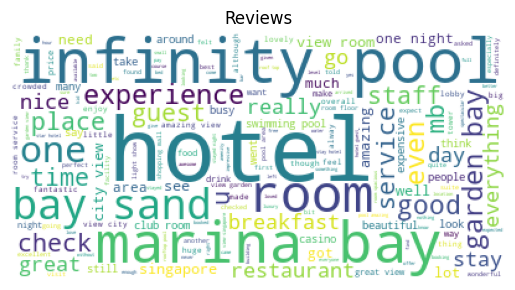

In [16]:
wordcloud_review = WordCloud(background_color="white")

# Generate a word cloud
wordcloud_review.generate(review_string)

plt.imshow(wordcloud_review)
plt.axis('off')
plt.title("Reviews")

plt.show()

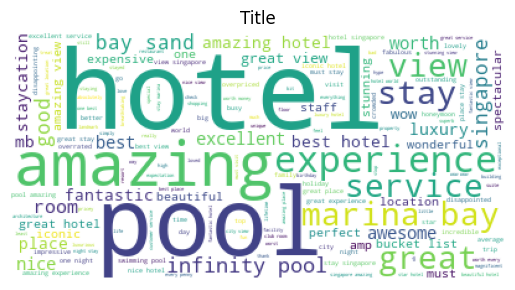

In [17]:
wordcloud_title = WordCloud(background_color="white")

wordcloud_title.generate(title_string)

plt.imshow(wordcloud_title)
plt.axis('off')
plt.title("Title")

plt.show()

In [18]:
ta_df

,Review Title,Review Text,Date of Stay,Author Contribution,Rating,review_clean,title_clean
0,Must see in Singapore,A must not miss place for tourists to visit wh...,2024-03-01,73,5,must miss place tourist visit singapore pretty...,must see singapore
1,Marina Bay world class,Amazing hotel and loved the facilities. Being ...,2024-03-01,1,5,amazing hotel loved facility someone enjoys gy...,marina bay world class
2,Nice touch.,While the initial check in experience was not ...,2024-03-01,2,5,initial check experience expected nicole manag...,nice touch
3,Amazing experience at MBS with superb hospital...,I booked the Sands Premiere Suite to celebrate...,2024-03-01,1,5,booked sand premiere suite celebrate anniversa...,amazing experience mb superb hospitality service
4,Incredibile,"Nina is amazing as all the team, I loved her h...",2024-03-01,2,5,nina amazing team loved hand facial massage sp...,incredibile
...,...,...,...,...,...,...,...
11227,Aweseome view over the Harbour,Amazing design ! I wouldnt recommend to sleep...,2014-03-01,131,4,amazing design wouldnt recommend sleep think h...,aweseome view harbour
11228,Excellent Property but poor services,Stayed in this hotel during the period Novembe...,2014-03-01,15,3,stayed hotel period november hotel excellent p...,excellent property poor service
11229,Stunning &amp; Mesmeric,When you walk out on to that roof for the firs...,2014-03-01,25,5,walk roof first time left absolutely speechles...,stunning amp mesmeric
11230,A Slice of Heaven,One can say what they want about this property...,2014-02-01,5,4,one say want property completely worth every p...,slice heaven


# Rule Based Sentiment Analysis

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

review = "With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent."
scores = analyzer.polarity_scores(review)
ta_df['BagOfScores_Review'] = ta_df['review_clean'].apply(lambda x: analyzer.polarity_scores(x))
ta_df['BagOfScores_Title'] = ta_df['title_clean'].apply(lambda x: analyzer.polarity_scores(x))
ta_df['VADERCompoundScore_Review'] = ta_df['BagOfScores_Review'].apply(lambda x: x['compound'])
ta_df['VADERCompoundScore_Title'] = ta_df['BagOfScores_Title'].apply(lambda x: x['compound'])


In [20]:
ta_df_neg = ta_df[ta_df['Rating'] == 1]
ta_df_neg

,Review Title,Review Text,Date of Stay,Author Contribution,Rating,review_clean,title_clean,BagOfScores_Review,BagOfScores_Title,VADERCompoundScore_Review,VADERCompoundScore_Title
26,One night only if you must!,We will certainly never stay here again. First...,2024-03-01,4,1,certainly never stay first impression stick mb...,one night must,"{'neg': 0.136, 'neu': 0.78, 'pos': 0.085, 'com...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.6278,0.0000
28,Terrible Experience at Hefty Cost,Post on behalf of husband butnI was one of the...,2024-03-01,3,1,post behalf husband butni one occupant subject...,terrible experience hefty cost,"{'neg': 0.208, 'neu': 0.642, 'pos': 0.15, 'com...","{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'comp...",-0.9794,-0.4767
59,"The staffs and city view are great, but no wor...",You paid $1300 au for a night room looks like ...,2024-02-01,1,1,paid au night room look like back make booking...,staff city view great worth money,"{'neg': 0.027, 'neu': 0.651, 'pos': 0.322, 'co...","{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.9246,0.7184
67,"The staffs and city view are great, but no wor...",You paid $1300 au for a night room looks like ...,2024-02-01,1,1,paid au night room look like back make booking...,staff city view great worth money,"{'neg': 0.027, 'neu': 0.651, 'pos': 0.322, 'co...","{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.9246,0.7184
87,No one will care about your requests at this h...,1st night so far and extremely disappointed.Ch...,2024-02-01,12,1,night far extremely midnight paid full rate up...,one care request hotel,"{'neg': 0.114, 'neu': 0.758, 'pos': 0.128, 'co...","{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...",0.4767,0.4939
...,...,...,...,...,...,...,...,...,...,...,...
10882,Prison Stay,Paid almost $600 for one night and given 2 key...,2014-12-01,9,1,paid almost one night given key card everywher...,prison stay,"{'neg': 0.232, 'neu': 0.671, 'pos': 0.097, 'co...","{'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'comp...",-0.7914,-0.5106
10898,poor customer service,I made a reservation for a room for New Years ...,2014-12-01,40,1,made reservation room new year eve period canc...,poor customer service,"{'neg': 0.12, 'neu': 0.515, 'pos': 0.365, 'com...","{'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'comp...",0.9559,-0.4767
11006,Events team could be Improve,I expected top-notch services from luxury hote...,2014-10-01,1,1,expected service luxury hotel singapore howeve...,event team could improve,"{'neg': 0.346, 'neu': 0.558, 'pos': 0.096, 'co...","{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",-0.9042,0.4404
11055,snobbish approach for poor service,The hotel has a very poor service. We stayed t...,2014-09-01,2,1,hotel poor service stayed sometime ago paid to...,snobbish approach poor service,"{'neg': 0.115, 'neu': 0.746, 'pos': 0.139, 'co...","{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'comp...",0.3400,-0.6124


# LSTM Sentiment Analysis using pre-trained model on movies_review

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [22]:
# Check cuda status
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [23]:
base_csv = 'Test.csv'
df = pd.read_csv(base_csv)

X,y = df['text'].values,df['label'].values
# drop a bunch of unrelated columns which are unnecessary for our model to work and are only slowing it down.
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y, test_size=0.2)
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (4000,)
shape of test data is (1000,)


In [24]:
print('\n Text input: {}\n'.format(x_train[0]))
print('\n Text input: {}\n'.format(x_train[1]))
print('\n Text input: {}\n'.format(x_train[2]))


 Text input: Like most people out there who have watched James Bond 007 movies. Most people NEVER knew that Thunderball was originally the FIRST 007 Movie to be released, but after Ian Fleming, wrote the story with kevin mcclory and jack whittingham. The 2 other authors took Ian Fleming to court and WON THE CASE providing evidence that ian fleming took the ideas of SPECTRE(Special Executive In CounterIntelligence Terrorism Revenge Extortion). So rather than making Thunderball they(fleming,broccoli,saltzman) went on to make Dr NO.<br /><br />This movie had the best of the best, From getting sean connery to come back one more time, he was paid over 5,000,000 for NSNA. Irvin Kershner and Sean Connery had problems on the set, that much is true. But overall this movie was up there i think with(Thunderball, Licence To Kill, Dr No) those are my favorite from the bond series. David Dryer was hired for Special Photographic Effects, he was working at the time on Bladerunner beFORE NEVER SAY NEV

In [25]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

def tockenize(x_train,y_train,x_val,y_val):
    word_list = []

    stop_words = set(stopwords.words('english'))
    for sent in x_train:
        # print(type(sent)) 'str'
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)

    corpus = Counter(word_list)
    # sorting on the basis of 1000 most common words.
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}

    # tockenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                    if preprocess_string(word) in onehot_dict.keys()])

    return np.array(final_list_train, dtype=object), np.array(final_list_test, dtype=object), onehot_dict

x_train,x_test,vocab = tockenize(x_train,y_train,x_test,y_test)
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


In [26]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

#we have very less number of reviews with length > 500.
#So we will consider only those below it.
x_train_pad = padding_(x_train,500)
x_test_pad = padding_(x_test,500)

In [27]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [28]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample sentences x: \n', sample_x)
print('Sample targets y: \n', sample_y)

Sample input size:  torch.Size([50, 500])
Sample sentences x: 
 tensor([[  0,   0,   0,  ...,  51, 237,   2],
        [  0,   0,   0,  ...,  55,  18, 696],
        [  0,   0,   0,  ...,  45,  38, 678],
        ...,
        [  0,   0,   0,  ..., 240, 102,  49],
        [  0,   0,   0,  ..., 100, 286,   2],
        [  0,   0,   0,  ..., 925, 545, 168]])
Sample targets y: 
 tensor([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0])


In [29]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim):
        super(SentimentRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)

        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self,x,hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 64]; 64 is the embedding_dim defined below.
        lstm_out, hidden = self.lstm(embeds, hidden)
        # Calling lstm_out.contiguous()to ensure the output tensor from the LSTM is contiguous before performing the view operation.
        # reshapes the lstm_out tensor to have 2D layer with a shape of (batch_size * sequence_length, hidden_dim).
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)

        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels, this is very important for an output of a sentiment score!!!

        # return last sigmoid output and hidden state
        return sig_out, hidden



    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [30]:
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 1
hidden_dim = 256


model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim)

#moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [31]:
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [40]:
# set the gradient clipping threshold and number of training epochs
clip = 5
epochs = 20

# Initialize the minimum validation loss as positive infinity
valid_loss_min = np.Inf

epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    # set the model to training mode
    model.train()
    # initialize hidden state
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # Clear the gradients
        model.zero_grad()
        # Perform a forward pass through the model
        output,h = model(inputs,h)

        # calculate the loss and perform backpropogation
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())

        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        # Gradient Clipping: `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        # Optimizer Step: Update the model's parameters using the optimizer
        optimizer.step()


    # validation
    # Set Model to Evaluation Mode
    model.eval()
    # Initialize Hidden States
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    # Loop Through Test Data
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)
            # Forward Pass
            output, val_h = model(inputs, val_h)

            # Calculate Loss and Metrics(Accuracy)
            val_loss = criterion(output.squeeze(), labels.float())
            val_losses.append(val_loss.item())
            accuracy = acc(output,labels)
            val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    # Aggregate Metrics
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    print(25*'==')

Epoch 1
train_loss : 0.6514710783958435 val_loss : 0.6008588433265686
train_accuracy : 61.275 val_accuracy : 66.60000000000001
Epoch 2
train_loss : 0.5523050062358379 val_loss : 0.5728093475103379
train_accuracy : 73.32499999999999 val_accuracy : 70.3
Epoch 3
train_loss : 0.49961262941360474 val_loss : 0.5460373416543007
train_accuracy : 77.35 val_accuracy : 74.6
Epoch 4
train_loss : 0.429928195476532 val_loss : 0.5794364362955093
train_accuracy : 81.45 val_accuracy : 75.8
Epoch 5
train_loss : 0.3614156197756529 val_loss : 0.507590328156948
train_accuracy : 85.7 val_accuracy : 77.10000000000001
Epoch 6
train_loss : 0.3176408851519227 val_loss : 0.5254556640982628
train_accuracy : 86.65 val_accuracy : 76.1
Epoch 7
train_loss : 0.27660863026976584 val_loss : 0.5656977832317353
train_accuracy : 89.1 val_accuracy : 75.8
Epoch 8
train_loss : 0.20994460927322506 val_loss : 0.7082295566797256
train_accuracy : 91.5 val_accuracy : 77.10000000000001
Epoch 9
train_loss : 0.14164745481684804 val_l

In [33]:
torch.save(model.state_dict(), 'sentiment.pt')

In [34]:
model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim)
model.load_state_dict(torch.load('sentiment.pt'))
model.eval()

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [35]:
X_ta_df = ta_df['Review Text']
print('\n Text input: {}\n'.format(X_ta_df[0]))


 Text input: A must not miss place for tourists to visit when in Singapore. It's a pretty nice place to take a walk and enjoy the view. Plenty of people from locals to tourists. A lot of nearby restos and bars but expect it to be a bit pricey.  It's free to walk around. It's nicer to do that late afternoons to evenings since it's rather hot during the day.



In [36]:
X_ta_df,_,vocab = tockenize(x_train=X_ta_df, x_val=X_ta_df, y_train=None, y_val=None)
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


In [71]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

#we have very less number of reviews with length > 500.
#So we will consider only those below it.
X_ta_df_pad = padding_(X_ta_df,500)
# x_test_pad = padding_(x_test,500)
X_ta_df_pad

array([[  0,   0,   0, ..., 334, 374,  44],
       [  0,   0,   0, ...,  55,   1,  20],
       [  0,   0,   0, ..., 291, 969, 391],
       ...,
       [  0,   0,   0, ...,   3,  20, 426],
       [  0,   0,   0, ...,  20,  42, 210],
       [  0,   0,   0, ..., 854, 133, 508]])

In [72]:
y_train.shape
X_ta_df_pad.shape

(11232, 500)

In [75]:
# create Tensor datasets
ta_data = TensorDataset(torch.from_numpy(X_ta_df_pad), torch.from_numpy(np.zeros((11232,0))))

# dataloaders
batch_size = 32

# make sure to SHUFFLE your data
ta_loader = DataLoader(ta_data, shuffle=False, batch_size=32)


ta_h = model.init_hidden(batch_size)
ta_losses = []
ta_acc = 0.0
output_total = []

with torch.no_grad():
        for inputs, labels in ta_loader:
                ta_h = tuple([each.data for each in ta_h])

                inputs, labels = inputs.to(device), labels.to(device)
                # Forward Pass
                output, ta_h = model(inputs, ta_h)
                output_total.extend(output.tolist())
        


In [76]:
output_total


[0.518582820892334,
 0.5111122727394104,
 0.5108322501182556,
 0.5156794786453247,
 0.5116506814956665,
 0.5080628991127014,
 0.512122392654419,
 0.5159981846809387,
 0.5136849880218506,
 0.5179286003112793,
 0.5096999406814575,
 0.5161002278327942,
 0.5115262269973755,
 0.5120946764945984,
 0.5099749565124512,
 0.5152730345726013,
 0.5171665549278259,
 0.5150994658470154,
 0.5144235491752625,
 0.5194205045700073,
 0.5113958120346069,
 0.5131829977035522,
 0.5123686790466309,
 0.5130842328071594,
 0.5165945291519165,
 0.5102266669273376,
 0.5127269625663757,
 0.5123646259307861,
 0.5152628421783447,
 0.5120379328727722,
 0.5080628991127014,
 0.512122392654419,
 0.5162968039512634,
 0.5114038586616516,
 0.5136849880218506,
 0.5129384398460388,
 0.5133719444274902,
 0.5123646259307861,
 0.5096344947814941,
 0.5092814564704895,
 0.511408805847168,
 0.5150492191314697,
 0.5144634246826172,
 0.5145522356033325,
 0.5126936435699463,
 0.5114396810531616,
 0.5088444948196411,
 0.51191383600234

In [77]:
output_normalised = [(i - min(output_total))/(max(output_total) - min(output_total)) for i in output_total]
output_normalised
ta_df['LSTM_Score'] = output_normalised

In [80]:
ta_df[ta_df['Rating'] == 1]

,Review Title,Review Text,Date of Stay,Author Contribution,Rating,review_clean,title_clean,BagOfScores_Review,BagOfScores_Title,VADERCompoundScore_Review,VADERCompoundScore_Title,LSTM_Score
26,One night only if you must!,We will certainly never stay here again. First...,2024-03-01,4,1,certainly never stay first impression stick mb...,one night must,"{'neg': 0.136, 'neu': 0.78, 'pos': 0.085, 'com...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.6278,0.0000,0.484313
28,Terrible Experience at Hefty Cost,Post on behalf of husband butnI was one of the...,2024-03-01,3,1,post behalf husband butni one occupant subject...,terrible experience hefty cost,"{'neg': 0.208, 'neu': 0.642, 'pos': 0.15, 'com...","{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'comp...",-0.9794,-0.4767,0.614045
59,"The staffs and city view are great, but no wor...",You paid $1300 au for a night room looks like ...,2024-02-01,1,1,paid au night room look like back make booking...,staff city view great worth money,"{'neg': 0.027, 'neu': 0.651, 'pos': 0.322, 'co...","{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.9246,0.7184,0.568007
67,"The staffs and city view are great, but no wor...",You paid $1300 au for a night room looks like ...,2024-02-01,1,1,paid au night room look like back make booking...,staff city view great worth money,"{'neg': 0.027, 'neu': 0.651, 'pos': 0.322, 'co...","{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.9246,0.7184,0.568007
87,No one will care about your requests at this h...,1st night so far and extremely disappointed.Ch...,2024-02-01,12,1,night far extremely midnight paid full rate up...,one care request hotel,"{'neg': 0.114, 'neu': 0.758, 'pos': 0.128, 'co...","{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...",0.4767,0.4939,0.530244
...,...,...,...,...,...,...,...,...,...,...,...,...
10882,Prison Stay,Paid almost $600 for one night and given 2 key...,2014-12-01,9,1,paid almost one night given key card everywher...,prison stay,"{'neg': 0.232, 'neu': 0.671, 'pos': 0.097, 'co...","{'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'comp...",-0.7914,-0.5106,0.515559
10898,poor customer service,I made a reservation for a room for New Years ...,2014-12-01,40,1,made reservation room new year eve period canc...,poor customer service,"{'neg': 0.12, 'neu': 0.515, 'pos': 0.365, 'com...","{'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'comp...",0.9559,-0.4767,0.462931
11006,Events team could be Improve,I expected top-notch services from luxury hote...,2014-10-01,1,1,expected service luxury hotel singapore howeve...,event team could improve,"{'neg': 0.346, 'neu': 0.558, 'pos': 0.096, 'co...","{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",-0.9042,0.4404,0.347363
11055,snobbish approach for poor service,The hotel has a very poor service. We stayed t...,2014-09-01,2,1,hotel poor service stayed sometime ago paid to...,snobbish approach poor service,"{'neg': 0.115, 'neu': 0.746, 'pos': 0.139, 'co...","{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'comp...",0.3400,-0.6124,0.338136
